NBA EXPLORING EFFICIENCY & STYLES OF PLAY

1.What is your project topic?  
The scope of this project is to classify players based on playing styles and efficiency. The goal is to see where a handful of players fall on this efficiency spectrum based on their styles (off ball, ball dominant, post, etc.) This factor analysis can offer some insight on which players could be targeted during free agency.


2.What were the “results” of your work?

Gathered career Average stats related to efficiency ('fga_per_g','fg3_pct','fg2_pct','efg_pct'(adjusted fg pct),'ft_pct','tov_per_g','orb_per_g') for a handful of players who from a high level tend to fall into some persona like Zach Lavine and Aaron Gordon both highly athletic players but not quite allstars yet, or John Wall and Russell Westbrook both all starts and very athletic. 

After scraping data I standardized it since the units varied across columns. I then used factor analysis to create a perceptual map and applied my domain knowledge and context of player stats to indicate labels for the axes and attribute vectors. 

The perceptual map shows on the x axis players that range from efficient to less efficient and an ideal archetype of efficiency are players like Nikola Jokic, JJ Redick, Pau Gasol. We also see the attribute vector of 'BIG MAN' point towards efficiency which makes sense given big men shoot closer to the basket and therefore would have a higher field goal percentage. Also it is worth mentioning that offensive rebounds per game was included in the array of stats, which is why some of the big men are clustered together. On the other end of the spectrum we observe the less efficient players like Russell Westbrook, Kobe Bryant, John Wall. Now this latter group has more starpower and most likely more field goal attempts which is skewing them towards the less efficient group, but as a further step it may be worth it to find or create some stat that quantifies their efficiency more relatively to that of a player not an allstart. This may help control for the superstar usage. The attribute vector points towards the more pure athletic players of the league who don't have the most polished skills like Russell Westbrook, John Wall, and Demar Derozan. These players have made a name for themselves out of sheer athleticism but as we are seeing athleticism only takes you so far. 

On the y axis we notice that the higher you go the more you see non dominant off the ball players. A prime example is JJ Reddick and Joe Ingles. These players are known to move without the ball and get to their spots. They don't get the most touches but when they do they make the most of them. The attribute vector pointed closely to the off ball y axis is European which sees mainly European players hovering around. The European style is more about collective play and moving the ball well to find the best situation to score. There are set offenses as well as an emphasis on team defense rather than the 1 on 1 defense relying on a players wingspan, which is usually a foul in the euro leagues. 

WHY IS THIS IMPORTANT?
This perceptual map quantifies how underrated some players are like Joe Ingles, JJ Redick, Domantas Sabonis. The dimensionality reduction of certain stats showcases some of the intangibles of the game like selflessness. The reduced stats also give us an indication of a players background and style of play. This can be suggestive of what players to target during free agency, particularly the efficient ones who aren't flashy causing them to fall under the radar. These players get overlooked at times because they aren't high on vanity metric stats which at times don't show the big picture. One use case of this could be Jordan Clarkson's $52 Million contract. Jordan Clarkson wasn't highly sought after until he was averaging around 15 ppg for a lottery Laker team. That 15 points per game is more difficult to come by on a championship level team. The point being, many big money free agent signings are based on high level stats and on the flipside efficient players making a one off impact (ie setup pass that led to assist, etc) may be worth exploring for future free agent signings. 


3.	What would the next logical step be in this exploration?

The next step would be to control for factors like era of basketball and add more players to get further validation. I'd also explore controlling for anomalies that do not fit my interpretation of the axes and attribute vectors, like Tim Duncan. From the basketball operations side I would see which players are set to be free agents in 2021 and 2022 and begin targeting and planning logistics for potential contracts. 

4.What did you find difficult to do during the project?
The data transformation took the longest during the course of the project. It was tough gathering average stats for each player because each player has their own page, which means scraping from 30 urls.


5.	What topic did you wish you were more knowledgeable about/what would have been handy to know while you were doing the project?
I wish I had used factor analysis more throughout the program. Just having used it once I wasn't fully aware of the nuances, like whether or not to standardize the data first then transform it in the factor analyzer library or to just go straight to fitting and transforming the raw data collected, of which I did the former. Also ideally I'd want to find which unique array of stats I can find which fit a certain theme like efficiency but at the same time stand alone without any multicollinearity.

In [1]:
from factor_analyzer import FactorAnalyzer
from matplotlib import pyplot as plt
from sklearn import manifold
from factor_analyzer import FactorAnalyzer
import pandas as pd

In [2]:
#RELEVANT DATA
#player stats standardized
sdf = pd.read_csv('sdf.csv', index_col = 0)

ANALYSIS

In [3]:
#FACTOR ANALYSIS 
fa = FactorAnalyzer(n_factors=4, rotation='oblimax')
fa_fit_out = fa.fit(sdf)
fa_communalities = fa_fit_out.get_communalities()
fa_scores = fa_fit_out.transform(sdf)
fa_factor_loadings = fa_fit_out.loadings_
r_sqrd = fa_communalities
reg_coef = fa_factor_loadings

outp = pd.DataFrame(fa_scores)
outp = outp.set_index(sdf.index.values)
players = outp.index.values.tolist()

VISUALIZATION

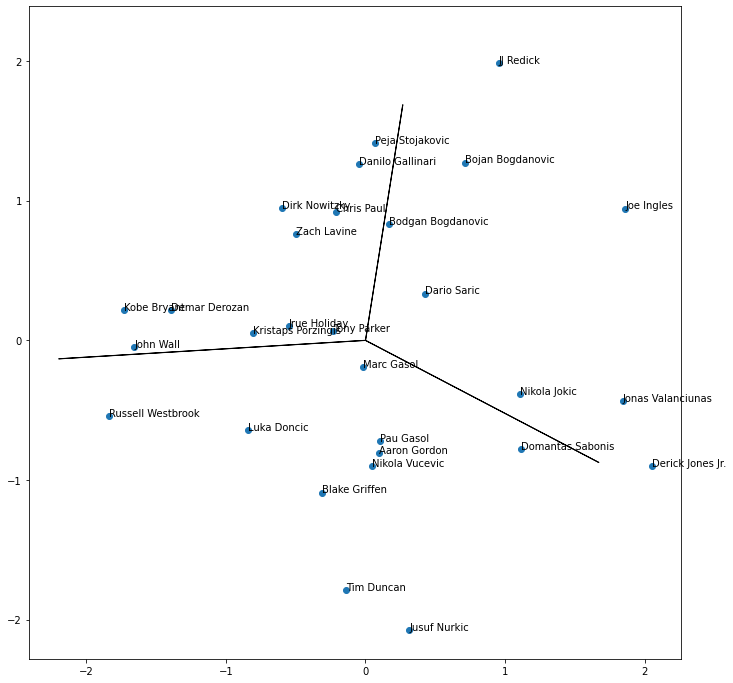

In [4]:
#PERCEPTUAL MAP
plt.figure(figsize=(12, 12))
plt.scatter(outp.iloc[:,0],outp.iloc[:,1])


for i,txt in enumerate(players):
    plt.annotate(txt,(outp.iloc[i,0],outp.iloc[i,1]))

for i in range(0,3):
    arrow_origin_x = 0
    arrow_origin_y = 0
    arrowlengthscaleup = 2
    betax = reg_coef[i,0]
    betay = reg_coef[i,1]
    R2value = r_sqrd[i]
    arrowlabel = players[i]
    arrow_end_x = (arrowlengthscaleup*R2value*betax)/((betax**2+betay**2)**1)
    arrow_end_y = (arrowlengthscaleup*R2value*betay)/((betax**2+betay**2)**1)
  
    plt.axis('square')
    plt.arrow(arrow_origin_x, arrow_origin_y, arrow_end_x-arrow_origin_x, arrow_end_y-arrow_origin_y, length_includes_head=True, 
          head_width= .0008, head_length= 0.0002)
plt.savefig('pmap.png', bbox_inches='tight') 